In [34]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [35]:
urls = search_images("bird images", max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

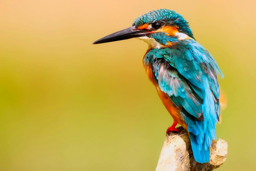

In [36]:
from fastdownload import download_url
dest = "is_bird_or_not/bird.jpg"

download_url(urls[0], dest)
from fastai.vision.all import *

im = Image.open(dest)
im.to_thumb(256,256)

In [37]:
download_url(search_images("forest images")[0], "is_bird_or_not/forest.jpg")

Path('is_bird_or_not/forest.jpg')

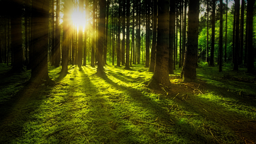

In [39]:
Image.open("is_bird_or_not/forest.jpg").to_thumb(256,256)

In [40]:
searches = "forest", "birds"
path = Path("is_bird_or_not/bird_or_not")

In [41]:
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

ValueError: unknown file extension: .fpx

In [42]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

40

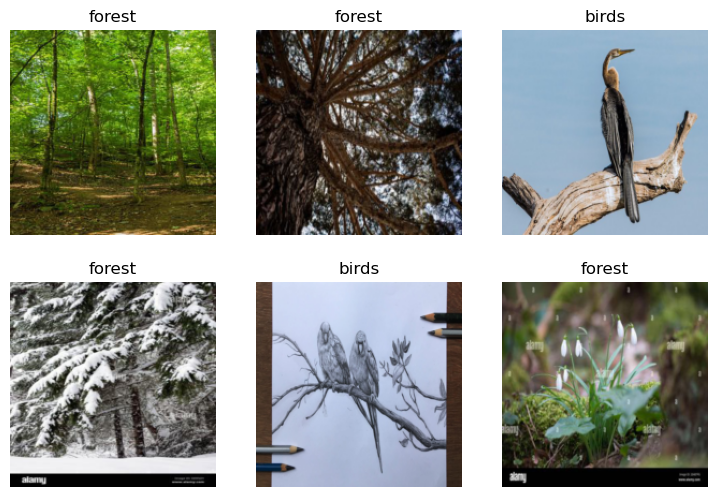

In [43]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [44]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.613278,0.421137,0.083333,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.202210,0.176924,0.050926,00:11
1,0.114050,0.213574,0.050926,00:11
2,0.076188,0.196574,0.050926,00:11


In [47]:
is_bird,_,probs = learn.predict(PILImage.create('is_bird_or_not/forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}\nProbability it's a forest image: {probs[1]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000
Probability it's a forest image: 1.0000
